In [13]:
import pandas as pd
# from google.colab import files
# files.upload()

In [14]:
df = pd.read_csv('Housing.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [15]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
for col in df.select_dtypes(include = ['object']).columns:
  df[col] = encoder.fit_transform(df[col])

In [16]:
X = df.drop('price',axis = 1)
Y = df['price']

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)
Y = scaler.fit_transform(Y.values.reshape(-1, 1))

In [18]:
import torch
X_tensor = torch.tensor(X, dtype=torch.float32)
Y_tensor = torch.tensor(Y, dtype=torch.float32).view(-1, 1)

In [19]:
import torch
import torch.nn as nn
import torch.optim as optim

class ANN(nn.Module):
    def __init__(self, num_features):
        super().__init__()
        self.linear = nn.Linear(num_features, 1)

    def forward(self, x):
        return self.linear(x)



In [11]:
learning_rates = [0.1, 0.01, 0.2]
shape = X.shape[1]
num_epochs = 20
loss_history = {}

for lr in learning_rates:
    print(f"\nTraining with learning rate = {lr}")

    model = ANN(shape)
    criterion = nn.MSELoss()
    optimizer = optim.SGD(model.parameters(), lr=lr)

    result = []
    for ep in range(num_epochs):
        model.train()
        y_preds = model(X_tensor)
        loss = criterion(y_preds, Y_tensor)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        model.eval()
        result.append(loss.item())
        print(f"Epoch {ep+1}/{num_epochs} | MSE: {loss.item():.6f}")

    loss_history[lr] = result


Training with learning rate = 0.1
Epoch 1/20 | MSE: 1.226227
Epoch 2/20 | MSE: 0.594575
Epoch 3/20 | MSE: 0.417013
Epoch 4/20 | MSE: 0.362052
Epoch 5/20 | MSE: 0.342162
Epoch 6/20 | MSE: 0.333411
Epoch 7/20 | MSE: 0.328806
Epoch 8/20 | MSE: 0.326059
Epoch 9/20 | MSE: 0.324290
Epoch 10/20 | MSE: 0.323098
Epoch 11/20 | MSE: 0.322270
Epoch 12/20 | MSE: 0.321682
Epoch 13/20 | MSE: 0.321257
Epoch 14/20 | MSE: 0.320946
Epoch 15/20 | MSE: 0.320715
Epoch 16/20 | MSE: 0.320541
Epoch 17/20 | MSE: 0.320409
Epoch 18/20 | MSE: 0.320308
Epoch 19/20 | MSE: 0.320230
Epoch 20/20 | MSE: 0.320170

Training with learning rate = 0.01
Epoch 1/20 | MSE: 0.805546
Epoch 2/20 | MSE: 0.771559
Epoch 3/20 | MSE: 0.740416
Epoch 4/20 | MSE: 0.711859
Epoch 5/20 | MSE: 0.685653
Epoch 6/20 | MSE: 0.661586
Epoch 7/20 | MSE: 0.639465
Epoch 8/20 | MSE: 0.619116
Epoch 9/20 | MSE: 0.600382
Epoch 10/20 | MSE: 0.583118
Epoch 11/20 | MSE: 0.567195
Epoch 12/20 | MSE: 0.552495
Epoch 13/20 | MSE: 0.538911
Epoch 14/20 | MSE: 0.52

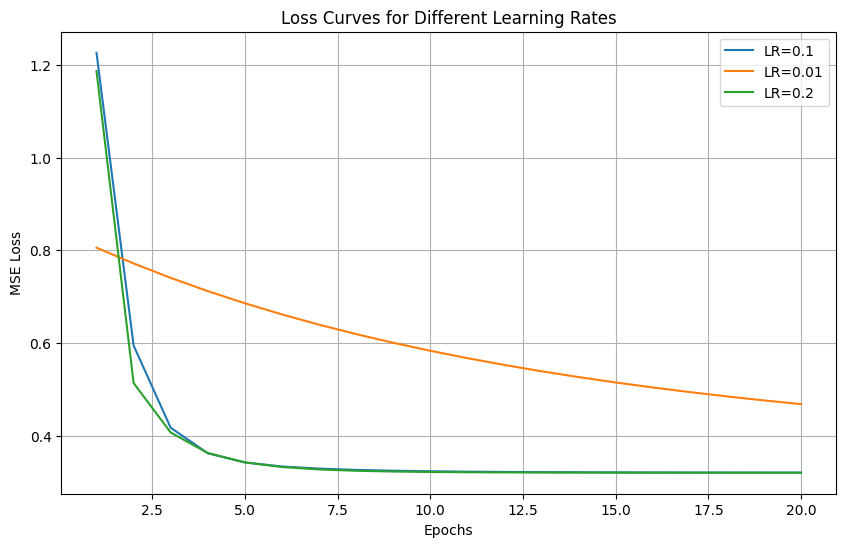

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
for lr, losses in loss_history.items():
    plt.plot(range(1, num_epochs+1), losses, label=f"LR={lr}")
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.title("Loss Curves for Different Learning Rates")
plt.legend()
plt.grid(True)
plt.show()